In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

#coisas para fazer o RFC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

#coisas para testar
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#separando em treino e teste

x=df.iloc[:,0:12]
y=df.iloc[:,12]

x_treino,x_teste,y_treino,y_teste=train_test_split(x,y,random_state=0,test_size=0.2)

In [4]:
#treinando a máquina 
rfc=RandomForestClassifier(criterion='entropy',random_state=0)
rfc.fit(x_treino,y_treino)

#testando o modelo
y_pred=rfc.predict(x_teste)
print('Score F1 =',f1_score(y_teste,y_pred))
print('Acurácia =',accuracy_score(y_teste,y_pred))

Score F1 = 0.7692307692307693
Acurácia = 0.85


Text(0.5, 1.0, '"Confusion Matrix normalizada para os valores reais"')

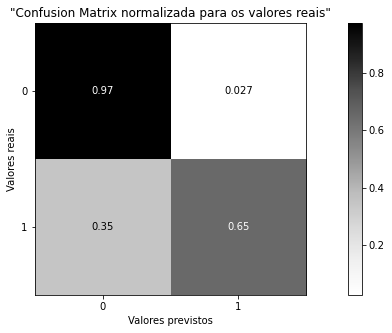

In [5]:
plot_confusion_matrix(rfc,x_teste,y_teste,values_format='.2g',normalize='true',cmap='Greys')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.title('"Confusion Matrix normalizada para os valores reais"')

In [6]:
def prever(arr):
    resultado=rfc.predict([arr])[0]
    if resultado==0:
        print('Tá okay.')
    else:
        print('Vai morrer ein.')

In [7]:
prever([90,1,981,0,30,0,136000,1.1,137,1,0,11])

Vai morrer ein.


In [8]:
prever([65,0,224,1,50,0,149000,1.3,137,1,1,72])

Tá okay.
